In [142]:
#importing my packages
import patatmo
import pandas
import time
import os
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [7]:
#raed the file with the data from all the stations for the year 2019
data_2019 = pd.read_csv('data_2019.csv')

In [14]:
#here I specify the exact summer period 
datumszomer = pd.date_range(start='2019-06-01', end='2019-09-01')
datumszomer = datumszomer.astype(str)
print(datumszomer)

Index(['2019-06-01', '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05',
       '2019-06-06', '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10',
       '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15',
       '2019-06-16', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
       '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25',
       '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30',
       '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05',
       '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10',
       '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15',
       '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20',
       '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25',
       '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29', '2019-07-30',
       '2019-07-31', '2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',

In [17]:
#in this for loop I check per station if they miss one day from the summer period. If that is the case, the station is added to the foutieve list I specify below.
#the stations from the foutieve list and their data are removed from the dataset used for the summer analysis
foutieve_stations_zomer = []
for station in data_2019.station_id.unique():
    timelist = data_2019[data_2019['station_id'] == station].time.str[:10].unique()
    for datum in datumszomer:
        if datum not in timelist:
            print(station, 'is missing day',datum)
            foutieve_stations_zomer.append(station)
            data_2019 = data_2019[data_2019['station_id'] != station]
            break

70:ee:50:00:04:b2 is missing day 2019-06-30
70:ee:50:00:38:bc is missing day 2019-06-04
70:ee:50:00:3f:bc is missing day 2019-06-01
70:ee:50:00:cf:52 is missing day 2019-06-01
70:ee:50:00:f7:ac is missing day 2019-06-01
70:ee:50:01:95:a4 is missing day 2019-08-22
70:ee:50:01:b2:94 is missing day 2019-06-05
70:ee:50:01:ce:b2 is missing day 2019-06-01
70:ee:50:02:7c:9e is missing day 2019-06-12
70:ee:50:02:87:80 is missing day 2019-08-26
70:ee:50:02:93:b8 is missing day 2019-07-17
70:ee:50:02:9d:ee is missing day 2019-07-06
70:ee:50:02:c5:48 is missing day 2019-06-01
70:ee:50:02:e7:2e is missing day 2019-06-03
70:ee:50:03:0b:5e is missing day 2019-06-05
70:ee:50:03:71:b2 is missing day 2019-06-01
70:ee:50:03:86:9e is missing day 2019-08-03
70:ee:50:03:bd:70 is missing day 2019-06-01
70:ee:50:03:c9:fa is missing day 2019-06-29
70:ee:50:03:cb:e2 is missing day 2019-06-01
70:ee:50:03:d0:38 is missing day 2019-06-04
70:ee:50:03:d2:e8 is missing day 2019-06-15
70:ee:50:04:9c:24 is missing day

In [20]:
#checking how many stations are left after executing the for loop
countstations = data_2019.station_id.unique()
print(len(countstations))

126


In [19]:
#saving it in between, saves time when kernel dies, do not have to execute the analysis again, can just start from the line below.
data_2019.to_csv(os.getcwd() + "\datacleanedsummertime.csv")

In [144]:
data_zomer = pd.read_csv('datacleanedsummertime.csv',index_col='time',parse_dates=['time'] )

In [26]:
#dropping redundant columns
data_dropped_columns = data_zomer.drop([ 'CO2', 'Pressure', 'Noise', 'Rain', 'WindStrength', 'WindAngle', 'GustStrength', 'GustAngle'], axis=1) 

In [145]:
#grouping the data per station id and resampling it to hourly data
data_H = data_zomer.groupby('station_id').resample('H').mean()
data_H_grp = data_H.reset_index().groupby('station_id')

In [29]:
test_nanvalues = data_dropped_columns.reset_index().groupby('station_id')

In [30]:
#testing if the dataset contains any nan values per station id
nanvalue = 0
for i in test_nanvalues:
    print('calculating for group:', i[0])
    invalid = False
    for j, (t_grp) in enumerate(zip(i[1].Temperature)):
        if t_grp != t_grp:
            print(t_grp)
            nanvalue+=1
print(nanvalue)

calculating for group: 70:ee:50:00:0a:3e
calculating for group: 70:ee:50:00:49:5e
calculating for group: 70:ee:50:00:51:30
calculating for group: 70:ee:50:00:6b:e6
calculating for group: 70:ee:50:00:c8:74
calculating for group: 70:ee:50:00:db:94
calculating for group: 70:ee:50:00:df:8a
calculating for group: 70:ee:50:00:ec:0a
calculating for group: 70:ee:50:01:00:34
calculating for group: 70:ee:50:01:49:a0
calculating for group: 70:ee:50:01:77:de
calculating for group: 70:ee:50:01:b1:6a
calculating for group: 70:ee:50:01:d5:fa
calculating for group: 70:ee:50:02:46:56
calculating for group: 70:ee:50:02:90:a4
calculating for group: 70:ee:50:02:92:94
calculating for group: 70:ee:50:02:93:6c
calculating for group: 70:ee:50:02:9d:0e
calculating for group: 70:ee:50:02:a5:12
calculating for group: 70:ee:50:02:a5:b8
calculating for group: 70:ee:50:02:af:54
calculating for group: 70:ee:50:02:b7:b8
calculating for group: 70:ee:50:02:be:22
calculating for group: 70:ee:50:02:d8:50
calculating for 

In [33]:
#resampling the data again, but not grouping it by ID this time so I can use it to calculate the st dev
mean_hourly_summer = data_dropped_columns.Temperature.resample('H').mean()
mean_hourly_summer_grp = mean_hourly_summer.reset_index()
mean_hourly_summer_grp

time  Temperature
0    2019-01-01 00:00:00+00:00     8.916667
1    2019-01-01 01:00:00+00:00     8.907096
2    2019-01-01 02:00:00+00:00     8.885455
3    2019-01-01 03:00:00+00:00     8.759347
4    2019-01-01 04:00:00+00:00     8.536534
...                        ...          ...
8755 2019-12-31 19:00:00+00:00     4.770643
8756 2019-12-31 20:00:00+00:00     5.014855
8757 2019-12-31 21:00:00+00:00     4.992868
8758 2019-12-31 22:00:00+00:00     4.605336
8759 2019-12-31 23:00:00+00:00     4.346950

[8760 rows x 2 columns]

In [140]:
import statistics 

In [36]:
#calculating the st dev from the hourly data
stdevmeans = statistics.stdev(mean_hourly_summer_grp.Temperature)
stdevmeans

6.225846853327876

In [45]:
#executing the three sigma method on the dataset and remvoing the stations that violate the rule
outliers = 0
verwijder = 0
for i in data_H_grp:
    print('calculating for group:', i[0])
    invalid = False
    for j, (t_grp, t_ref) in enumerate(zip(i[1].Temperature, mean_hourly_summer_grp.Temperature)):
        if abs((t_grp - t_ref)/stdevmeans) > 3:            
            outliers+=1 
            invalid = True
            print('outlier found in group:', i[0])
            break
    if invalid:
        verwijder+=1
        data_dropped_columns = data_dropped_columns[data_dropped_columns['station_id'] != i[0]]
print(outliers) 
print(verwijder)

calculating for group: 70:ee:50:00:0a:3e
calculating for group: 70:ee:50:00:49:5e
calculating for group: 70:ee:50:00:51:30
outlier found in group: 70:ee:50:00:51:30
calculating for group: 70:ee:50:00:6b:e6
calculating for group: 70:ee:50:00:c8:74
outlier found in group: 70:ee:50:00:c8:74
calculating for group: 70:ee:50:00:db:94
calculating for group: 70:ee:50:00:df:8a
calculating for group: 70:ee:50:00:ec:0a
calculating for group: 70:ee:50:01:00:34
calculating for group: 70:ee:50:01:49:a0
calculating for group: 70:ee:50:01:77:de
calculating for group: 70:ee:50:01:b1:6a
calculating for group: 70:ee:50:01:d5:fa
outlier found in group: 70:ee:50:01:d5:fa
calculating for group: 70:ee:50:02:46:56
calculating for group: 70:ee:50:02:90:a4
calculating for group: 70:ee:50:02:92:94
outlier found in group: 70:ee:50:02:92:94
calculating for group: 70:ee:50:02:93:6c
calculating for group: 70:ee:50:02:9d:0e
calculating for group: 70:ee:50:02:a5:12
calculating for group: 70:ee:50:02:a5:b8
calculating 

In [47]:
#resampling the data to daily data to plot it to check for outliers
data_daily = data_dropped_columns.groupby('station_id').resample('D').mean()
data_daily_grp = data_daily.reset_index().groupby('station_id')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

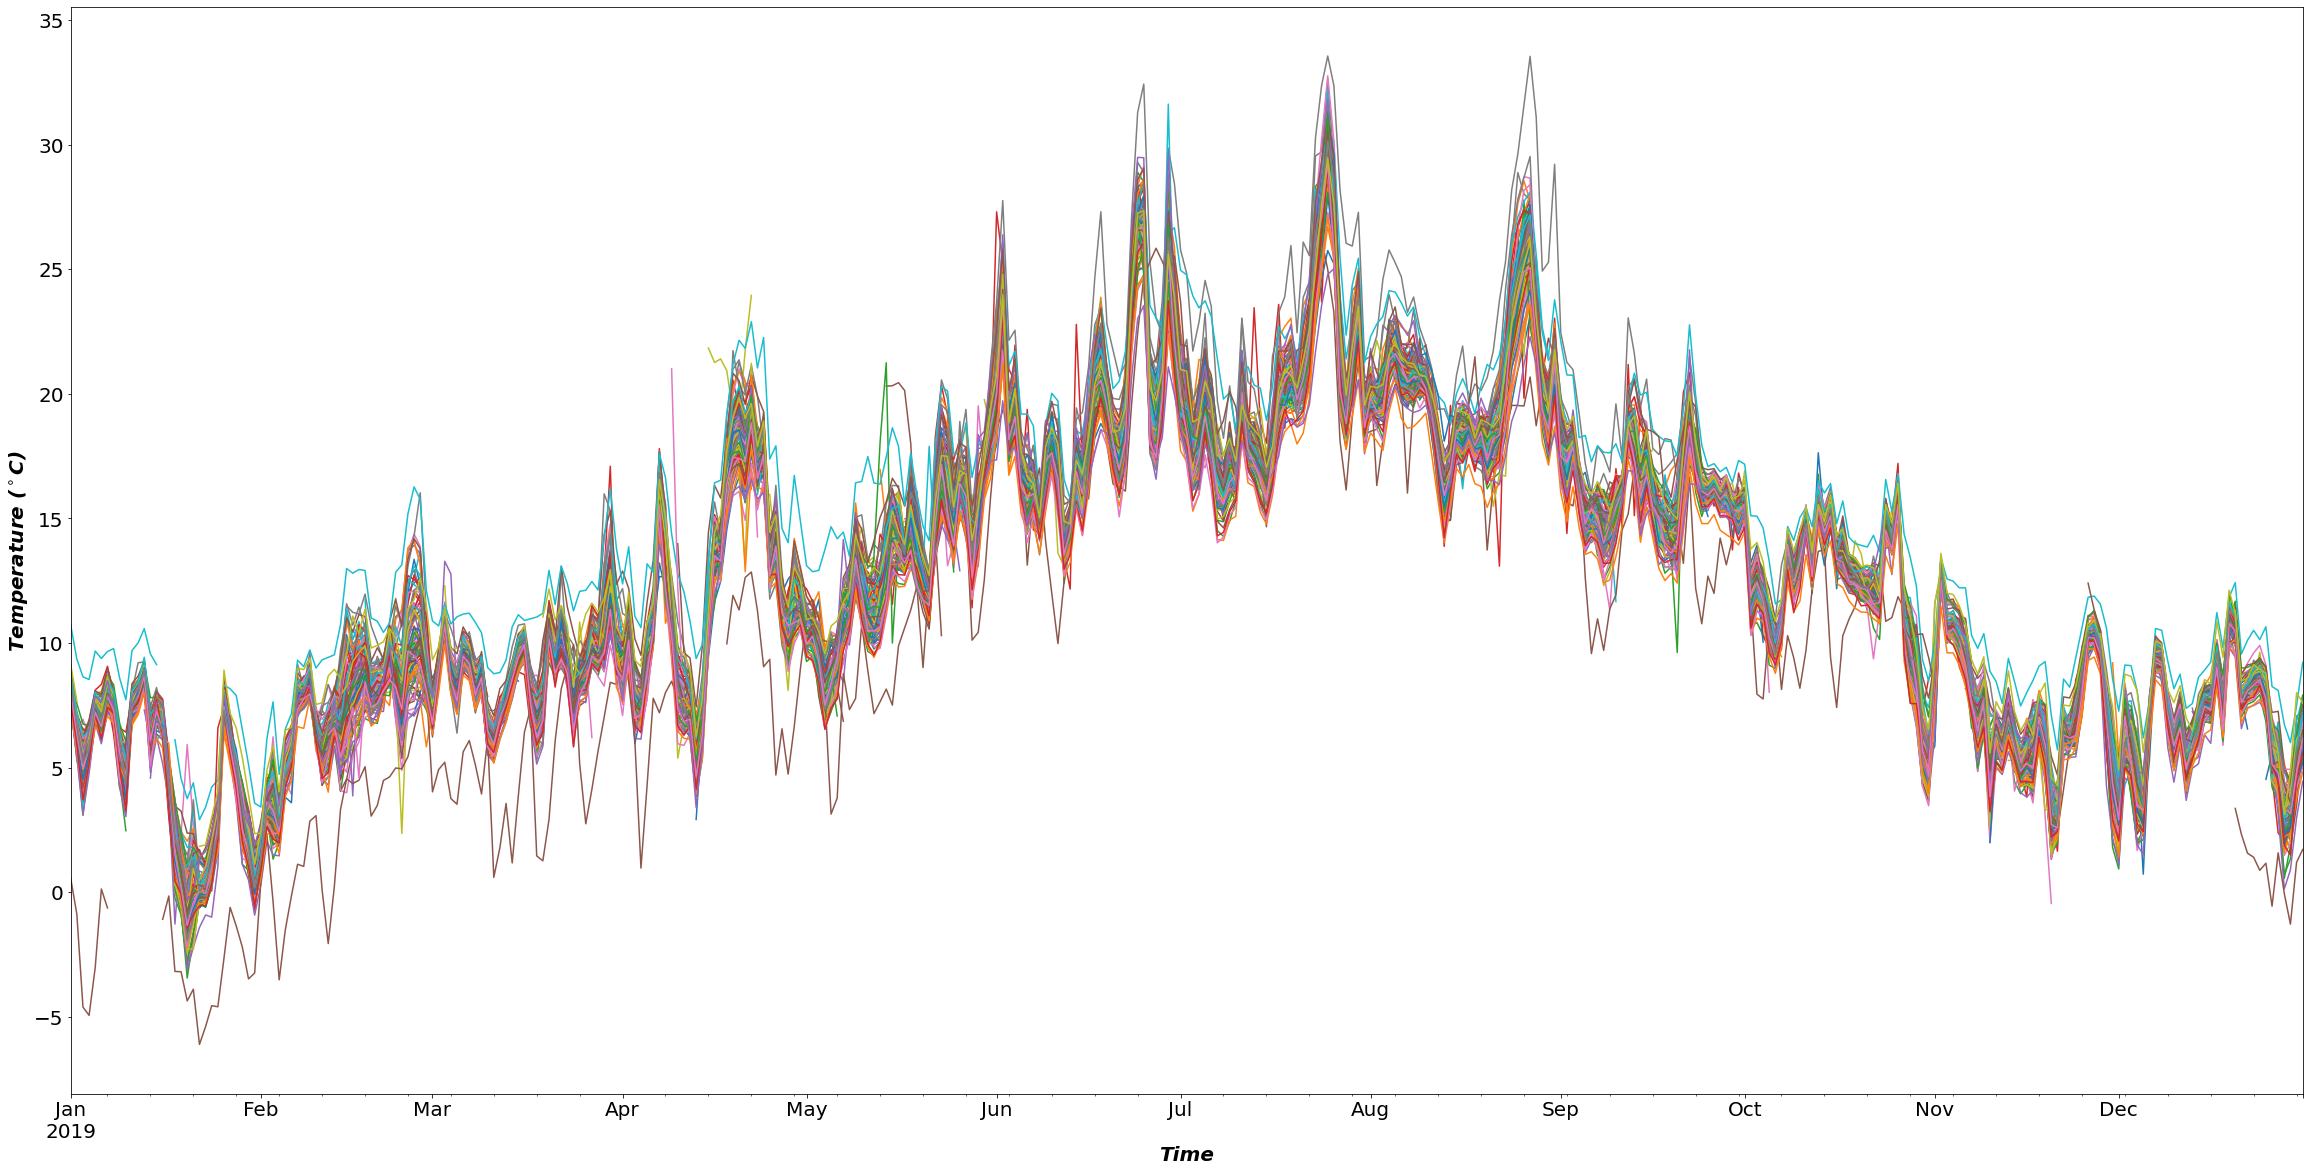

In [49]:
#plotting the Netatmo data over the whole year per station ID to check for outliers
fig, ax = plt.subplots(figsize=(40,20))
data_daily_grp.plot(x='time',y='Temperature',ax=ax,legend=False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time',fontsize=20, weight='bold', fontstyle='oblique')
plt.ylabel('Temperature ($^\circ$C)', fontsize=20, weight='bold', fontstyle='oblique')

In [55]:
#read the reference station file with data that matches the summmer period
os.chdir('C:\\Users\donna\\')
referencestationzomer = pd.read_csv('referentiestationzomermaanden.csv')
referencestation = pd.read_csv('referentiestation.csv')

In [59]:
#this for loop removes stations from the dataset that differ more than 12 degrees on the daily averages
verwijder = 0
for i in data_daily_grp:
    print('calculating for group:', i[0])
    invalid = False
    for j, (t_grp, t_ref) in enumerate(zip(i[1].Temperature, referencestation.Temperature)):
        if abs(t_grp - t_ref) > 12:            
            outliers+=1 
            invalid = True
            print('outlier found in group:', i[0])
            break
    if invalid:
        verwijder+=1
        data_dropped_columns = data_dropped_columns[data_dropped_columns['station_id'] != i[0]]
print(verwijder)

calculating for group: 70:ee:50:00:0a:3e
calculating for group: 70:ee:50:00:49:5e
calculating for group: 70:ee:50:00:6b:e6
calculating for group: 70:ee:50:00:db:94
outlier found in group: 70:ee:50:00:db:94
calculating for group: 70:ee:50:00:df:8a
calculating for group: 70:ee:50:00:ec:0a
calculating for group: 70:ee:50:01:00:34
calculating for group: 70:ee:50:01:49:a0
calculating for group: 70:ee:50:01:77:de
calculating for group: 70:ee:50:01:b1:6a
calculating for group: 70:ee:50:02:46:56
calculating for group: 70:ee:50:02:90:a4
calculating for group: 70:ee:50:02:93:6c
calculating for group: 70:ee:50:02:9d:0e
calculating for group: 70:ee:50:02:a5:12
calculating for group: 70:ee:50:02:a5:b8
calculating for group: 70:ee:50:02:af:54
calculating for group: 70:ee:50:02:b7:b8
calculating for group: 70:ee:50:02:be:22
calculating for group: 70:ee:50:02:d8:50
calculating for group: 70:ee:50:02:fb:ac
calculating for group: 70:ee:50:02:fc:b6
calculating for group: 70:ee:50:03:60:90
calculating for

In [60]:
#checking how many stations are left
countstations = data_dropped_columns.station_id.unique()
print(len(countstations))

96


In [61]:
#resampling the data, that is left after using the reference station method, to daily data in order to plot it once more to check for outliers
data_daily = data_dropped_columns.groupby('station_id').resample('D').mean()
data_daily_grp = data_daily.reset_index().groupby('station_id')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

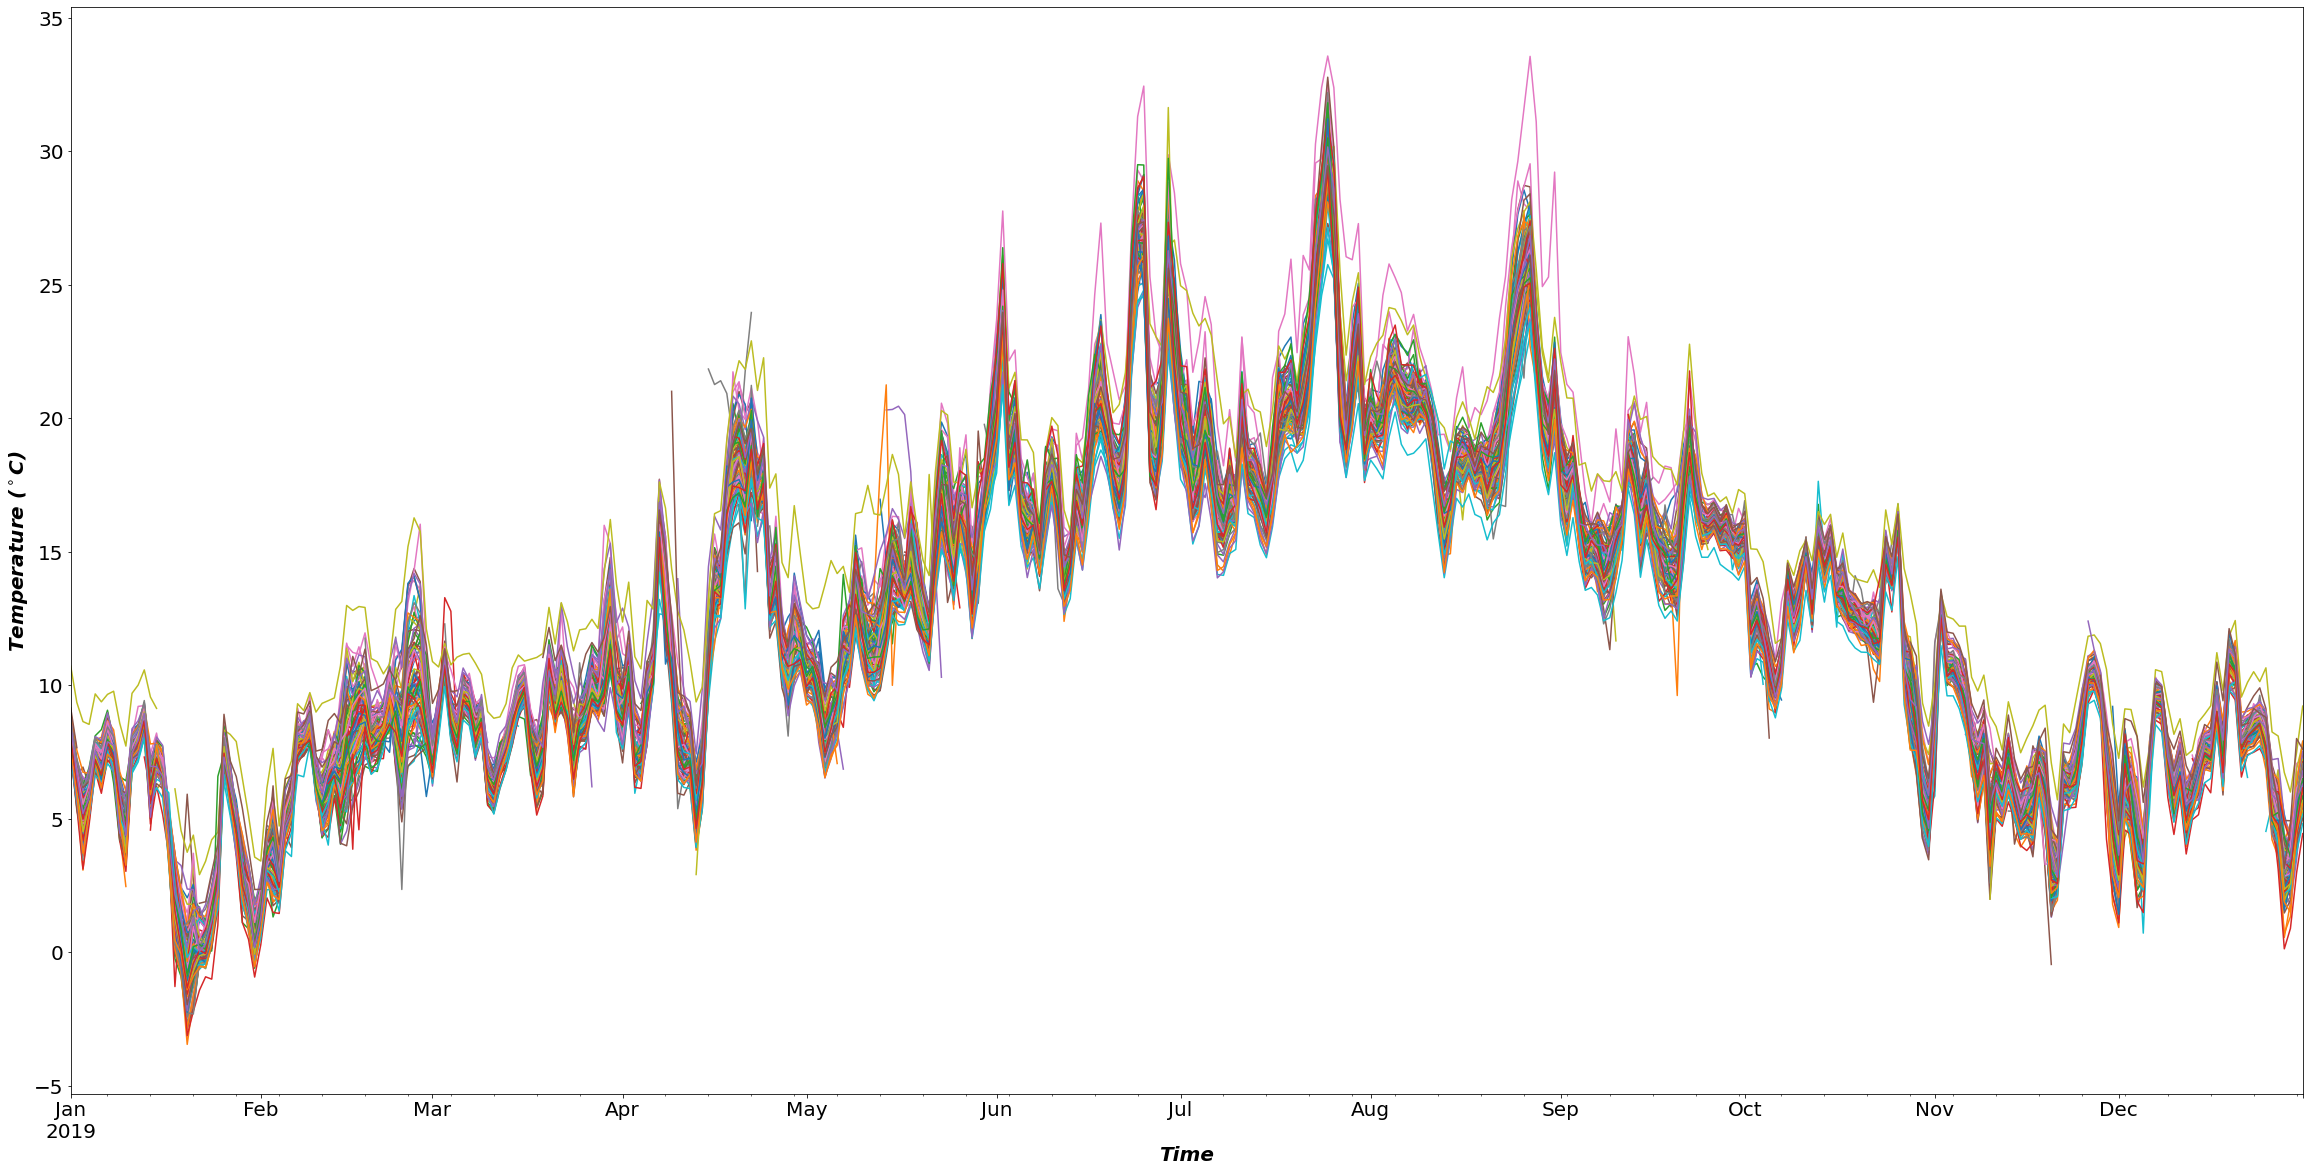

In [62]:
fig, ax = plt.subplots(figsize=(40,20))
data_daily_grp.plot(x='time',y='Temperature',ax=ax,legend=False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time',fontsize=20, weight='bold', fontstyle='oblique')
plt.ylabel('Temperature ($^\circ$C)', fontsize=20, weight='bold', fontstyle='oblique')

In [63]:
#creating a geodataframe in order to plot the locations of the staions left for the summer analysis
gdf = gpd.GeoDataFrame(data_dropped_columns, geometry=gpd.points_from_xy(x=data_dropped_columns['longitude'], y=data_dropped_columns['latitude']))
gdf.crs = {'init': 'epsg:4326'}

C:\Users\donna\anaconda3\envs\bep\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


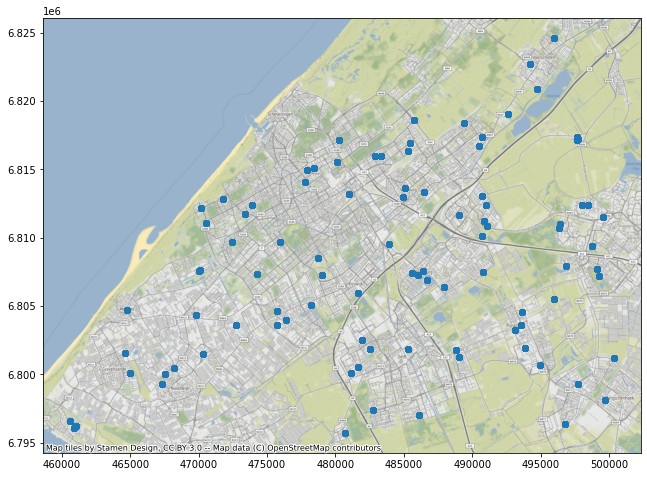

In [64]:
#visualizing the geodataframe
ax = gdf.to_crs(epsg=3857).plot(figsize=(18,8))
ctx.add_basemap(ax=ax)

In [69]:
#saving the cleaned data 
data_dropped_columns.to_csv(os.getcwd() + "\datacleanedsummertime_2.csv")

In [37]:
data_cleaned_2 = pd.read_csv('datacleanedsummertime_2.csv')

In [9]:
zomerdatums = pd.date_range(start='2019-06-01', end='2019-09-01')
zomerdatums = zomerdatums.astype(str)
#extracting the data that matches the summer period
temp_zomer = []
for datum in zomerdatums:
    print('processing date: ',datum)
    temp_zomer.append(data_cleaned_2.iloc[get_indices(data_cleaned_2,datum)])

processing date:  2019-06-01
processing date:  2019-06-02
processing date:  2019-06-03
processing date:  2019-06-04
processing date:  2019-06-05
processing date:  2019-06-06
processing date:  2019-06-07
processing date:  2019-06-08
processing date:  2019-06-09
processing date:  2019-06-10
processing date:  2019-06-11
processing date:  2019-06-12
processing date:  2019-06-13
processing date:  2019-06-14
processing date:  2019-06-15
processing date:  2019-06-16
processing date:  2019-06-17
processing date:  2019-06-18
processing date:  2019-06-19
processing date:  2019-06-20
processing date:  2019-06-21
processing date:  2019-06-22
processing date:  2019-06-23
processing date:  2019-06-24
processing date:  2019-06-25
processing date:  2019-06-26
processing date:  2019-06-27
processing date:  2019-06-28
processing date:  2019-06-29
processing date:  2019-06-30
processing date:  2019-07-01
processing date:  2019-07-02
processing date:  2019-07-03
processing date:  2019-07-04
processing dat

In [20]:
#saving it in a seperate dataframe, so we can continue with a dataframe that only contains the summer data
dfzomermaanden = pd.concat(temp_zomer)

In [23]:
#saving the summer data
dfzomermaanden.to_csv(os.getcwd() + "\datazomermaanden.csv")

In [24]:
datazomermaanden = pd.read_csv('datazomermaanden.csv',index_col='time',parse_dates=['time'] )

In [25]:
data_hourly = datazomermaanden.groupby('station_id').resample('H').mean()
data_hourly_grp = data_hourly.reset_index().groupby('station_id')

In [27]:
#extracting the temperature values of the rural site 
ruraltemphourly = data_hourly_grp.get_group('70:ee:50:03:60:90')
ruraltemphourly.Temperature

46866    14.075000
46867    13.966667
46868    13.875000
46869    13.875000
46870    13.991667
           ...    
49093    13.691667
49094    12.666667
49095    12.325000
49096    12.141667
49097    12.300000
Name: Temperature, Length: 2232, dtype: float64

In [28]:
#substracting every temperature value with the rural temperature value. This results in the hourly UHI values, which are saved in a seperate list 
uhimeanhourly = []
for i in data_hourly_grp:
    for j, (t_grp, t_rural) in enumerate(zip(i[1].Temperature, ruraltemphourly.Temperature)):
        value = t_grp- t_rural
        uhimeanhourly.append(value)

In [29]:
hourlydata = data_hourly.reset_index()

In [30]:
print(len(uhimeanhourly))
print(len(hourlydata))

214250
214250


In [31]:
#the UHImeanhourly list is added to the dataframe 
hourlydata['uhimeanhourly'] = uhimeanhourly

In [108]:
#calculating the mean UHI value over all stations for the summer period
hourlydata.uhimeanhourly.mean()

1.132770803455212

In [98]:
#finding the maximum UHI value over all stations for the summer period 
print(hourlydata[hourlydata.uhimeanhourly == hourlydata.uhimeanhourly.max()]) 

              station_id                      time  Unnamed: 0  Unnamed: 0.1  \
81594  70:ee:50:05:c4:14 2019-07-23 16:00:00+00:00   3745446.5     6694572.5   

       Unnamed: 0.1.1  Temperature   Humidity  latitude  longitude    year  \
81594         58976.5       47.575  28.916667  52.05511    4.40822  2019.0   

       month   day  uhimeanhourly  
81594    7.0  23.0      16.908333  


In [32]:
#grouping the hourly data per station id
groupedhourly = hourlydata.groupby('station_id')

Text(0, 0.5, 'Urban Heat Island effect ($^\\circ$C)')

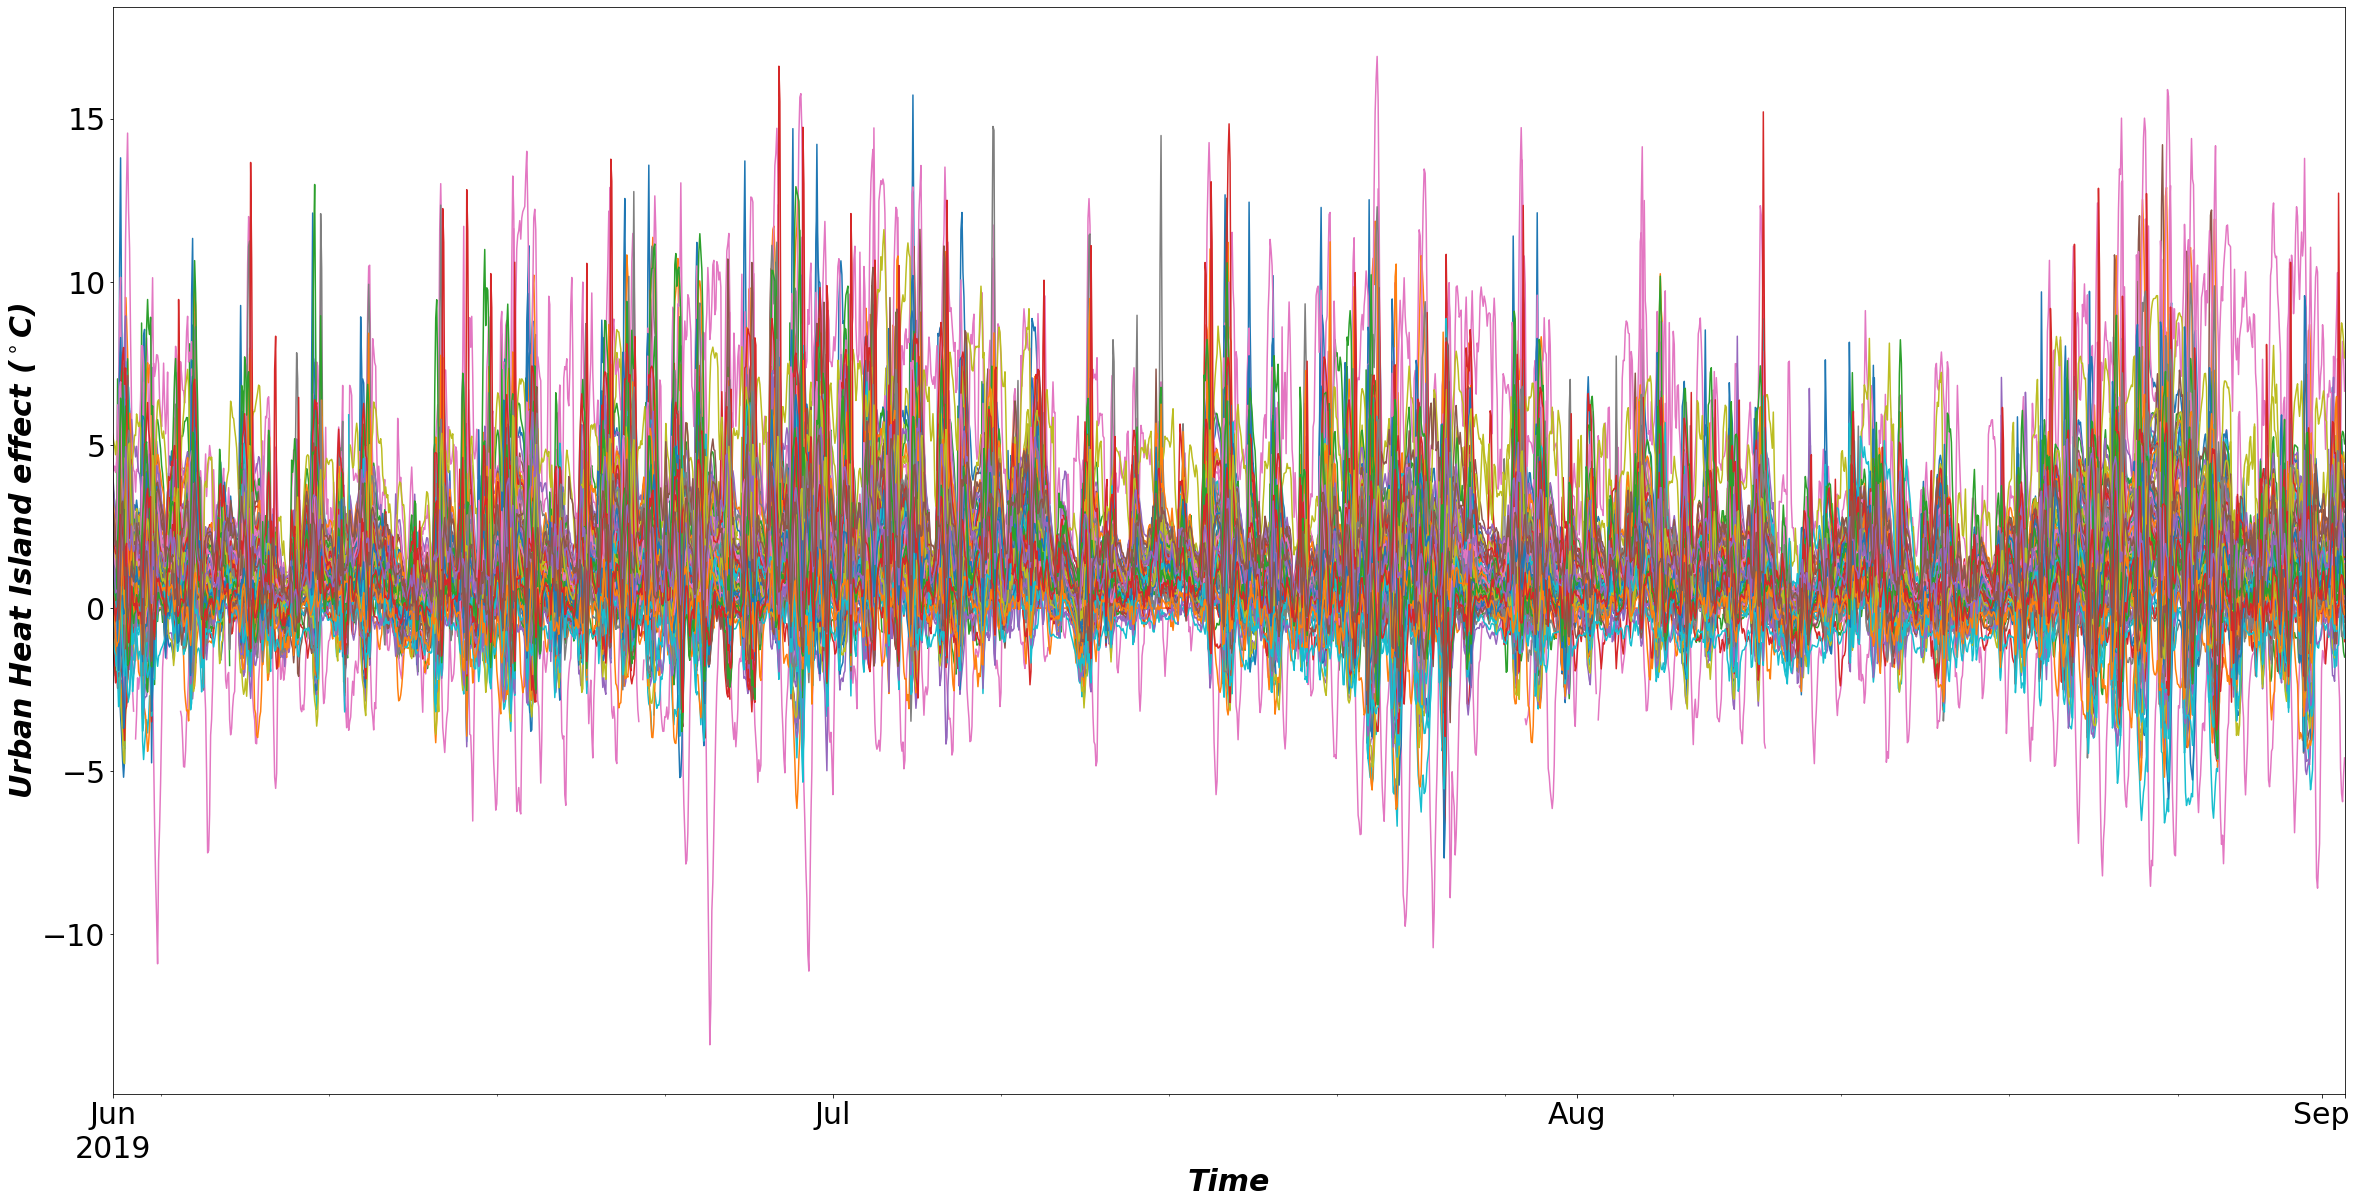

In [34]:
#plotting the UHI hourly values over the whole summer period 
fig, ax = plt.subplots(figsize=(40,20))
groupedhourly.plot(x='time',y='uhimeanhourly',ax=ax,legend=False)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Time',fontsize=30, weight='bold', fontstyle='oblique')
plt.ylabel('Urban Heat Island effect ($^\circ$C)', fontsize=30, weight='bold', fontstyle='oblique')

In [35]:
datazomermaanden.corr(method = 'pearson')

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Temperature  \
Unnamed: 0        1.000000      0.997902       -0.067342    -0.001256   
Unnamed: 0.1      0.997902      1.000000       -0.067534    -0.001125   
Unnamed: 0.1.1   -0.067342     -0.067534        1.000000     0.140260   
Temperature      -0.001256     -0.001125        0.140260     1.000000   
Humidity         -0.001435     -0.000615        0.035389    -0.717167   
latitude         -0.039038     -0.031788       -0.026599     0.011609   
longitude        -0.124908     -0.123265        0.044768     0.007640   
year                   NaN           NaN             NaN          NaN   
month             0.003210      0.001986        0.814764     0.066983   
day               0.001098      0.000706        0.270300     0.298783   

                Humidity  latitude  longitude  year     month       day  
Unnamed: 0     -0.001435 -0.039038  -0.124908   NaN  0.003210  0.001098  
Unnamed: 0.1   -0.000615 -0.031788  -0.123265   NaN  0.001986  0.000706  
Unnamed: 0.1.1  0.035389 -0.026599   0.044768   NaN  0.814764  0.270300  
Temperature    -0.717167  0.011609   0.007640   NaN  0.066983  0.298783  
Humidity        1.000000  0.002690  -0.002119   NaN  0.065958 -0.057832  
latitude        0.002690  1.000000   0.306129   NaN -0.000360 -0.000539  
longitude      -0.002119  0.306129   1.000000   NaN -0.000412 -0.000287  
year                 NaN       NaN        NaN   NaN       NaN       NaN  
month           0.065958 -0.000360  -0.000412   NaN  1.000000 -0.020158  
day            -0.057832 -0.000539  -0.000287   NaN -0.020158  1.000000

In [120]:
zomer = pd.read_csv('datazomermaandenUHI.csv')

In [6]:
#creating a function that enables me to extract the data that matches a specific date 
def get_indices(df, date):
    return [i for i, x in enumerate(df.time) if x[:len(date)] == date]

In [92]:
#extracting the max values on the 25th of july at 12 PM, I simply changed this date when I wanted to check for other moments of the day or other days
temp = zomer.iloc[get_indices(zomer,'2019-07-25 12')]
max_df = pd.DataFrame([temp[temp['station_id'] ==station].latitude.values[0], 
                        temp[temp['station_id'] ==station].longitude.values[0],
                        temp[temp['station_id'] ==station ].uhimeanhourly.max()] for station in temp.station_id)
max_df.columns=['latitude','longitude','max_uhi']
max_df = max_df.drop_duplicates(subset=['latitude','longitude','max_uhi'], keep='first')
print(max_df)

     latitude  longitude   max_uhi
0   52.060444   4.227097 -0.525000
1   52.072922   4.370294 -0.630128
2   51.985134   4.336664 -0.483333
3   52.019500   4.433837 -1.633333
4   52.043012   4.463507 -2.075000
..        ...        ...       ...
91  52.058436   4.458960  0.291667
92  51.978328   4.141649  3.066667
93  52.007690   4.225030  1.958333
94  51.979098   4.462866  1.666667
95  52.094134   4.313914 -0.607051

[96 rows x 3 columns]


In [104]:
print(max_df[max_df.max_uhi == max_df.max_uhi.max()]) 

     latitude  longitude  max_uhi                  geometry
31  52.102272   4.363328     10.8  POINT (4.36333 52.10227)


In [95]:
#here I change all the negative UHI values into 0 for the UHI map, I am only interested in the Heat islands, otherwise the map will be confusing
max_df.max_uhi[max_df.max_uhi < 0] = 0

In [97]:
from shapely.geometry import Point
# combine lat and lon column to a shapely Point() object and saving the dataframe as a Shapefile so it can be imported in QGis
max_df['geometry'] = max_df.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
import geopandas
juli25geo = geopandas.GeoDataFrame(max_df, geometry='geometry')
juli25geo.to_file('maxuhi25julinoon.shp', driver='ESRI Shapefile')

In [111]:
max_df.to_csv(os.getcwd() + "\juli25meanuhi.csv")